This was a mistake while practicing for linear regression as the dataset was highly multicolinear and there was very little information to actually build something.

That said, I still learnt a lot while troubleshooting this dataset which might help me in the future so I'm keeping this notebook as a learning notebook.

Enjoy this if you're looking for some deadly combination of brain issues and infinite debugging.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [47]:
df = pd.read_csv("Football_Player_Stats.csv")

In [48]:
df.shape

(18979, 13)

In [49]:
df.head()

,Name,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control
0,Lionel Messi,429,85,95,70,91,88,470,96,93,94,91,96
1,C. Ronaldo dos Santos Aveiro,437,84,95,90,82,86,414,88,81,76,77,92
2,Jan Oblak,95,13,11,15,43,13,109,12,13,14,40,30
3,Kevin De Bruyne,407,94,82,55,94,82,441,88,85,83,93,92
4,Neymar da Silva Santos Jr.,408,85,87,62,87,87,448,95,88,89,81,95


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18979 non-null  object
 1   Attacking         18979 non-null  int64 
 2   Crossing          18979 non-null  int64 
 3   Finishing         18979 non-null  int64 
 4   Heading Accuracy  18979 non-null  int64 
 5   Short Passing     18979 non-null  int64 
 6   Volleys           18979 non-null  int64 
 7   Skill             18979 non-null  int64 
 8   Dribbling         18979 non-null  int64 
 9   Curve             18979 non-null  int64 
 10  FK Accuracy       18979 non-null  int64 
 11  Long Passing      18979 non-null  int64 
 12  Ball Control      18979 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.9+ MB


In [51]:
df.columns

Index(['Name', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control'],
      dtype='object')

In [52]:
df.describe()

,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373
std,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892
min,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000
25%,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000
50%,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000
75%,297.000000,63.000000,62.000000,64.000000,68.000000,56.000000,310.000000,68.000000,61.000000,55.000000,64.000000,69.000000
max,437.000000,94.000000,95.000000,93.000000,94.000000,90.000000,470.000000,96.000000,94.000000,94.000000,93.000000,96.000000


Our target variable is 'Skill' and rest are independent variables.

In [53]:
df = df.drop(columns=['Name'])

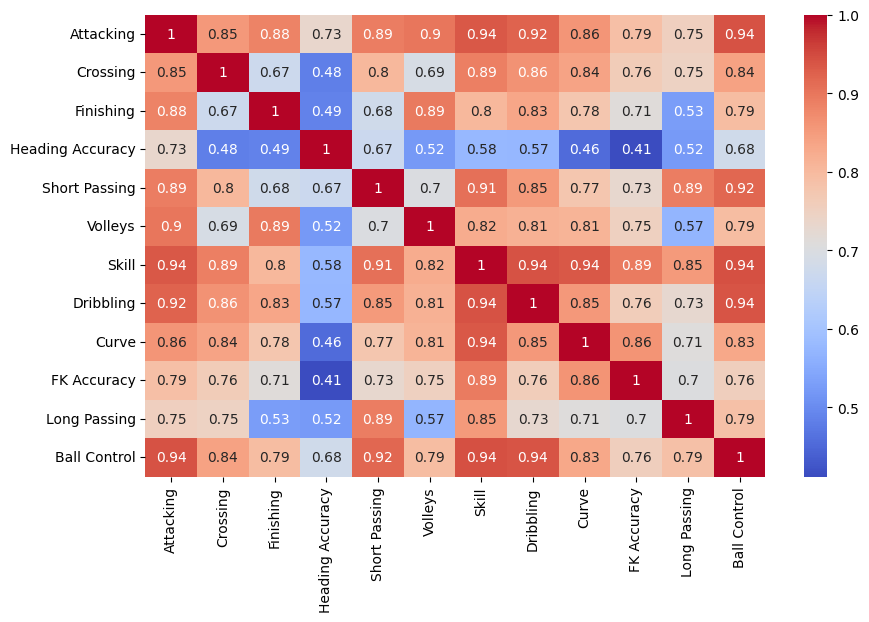

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")
plt.show()

As we can infer from this that most of the features have a positive correlation with our target variable,'Heading Accuracy' seem to have moderate effect.

The positive correlations seem a bit too high (above 0.9), target variable might be a calculated from these. We'll see more on this ahead.

#### Causation vs Correlation

To determine **causation**, we need **experiments** or **temporal data** (i.e., did X happen before Y?). Since our heatmap only shows **correlation**, we’ll list **possible causal relationships** based on soccer knowledge. These are **hypotheses**—we’d need further analysis (experiments/statistical tests) to confirm them.

---

##### **Likely Causal Relationships (Strong Domain Logic)**
1. **Dribbling → Ball Control**  
   - Practicing **dribbling** improves **ball control**.  
   - **Correlation: 0.94** (Strong)  
   - **Logical Reason**: Better dribbling naturally improves a player’s ability to control the ball.

2. **Short Passing → Long Passing**  
   - If a player is good at short passes, they often develop **long passing skills** over time.  
   - **Correlation: 0.89** (Strong)  
   - **Logical Reason**: Both involve similar technical skills (accuracy, foot positioning).

3. **Skill → Attacking**  
   - Higher skill levels lead to better attacking play.  
   - **Correlation: 0.94** (Very Strong)  
   - **Logical Reason**: Better skills mean better ability to dribble, finish, and create scoring chances.

4. **Skill → Dribbling**  
   - More skilled players are naturally better dribblers.  
   - **Correlation: 0.94** (Very Strong)  
   - **Logical Reason**: A player’s overall skill level affects their ability to move with the ball.

5. **FK Accuracy → Curve**  
   - Players with better **free kick accuracy** often have better **curve** ability.  
   - **Correlation: 0.94** (Very Strong)  
   - **Logical Reason**: Free kicks require bending the ball around defenders, which depends on curve ability.

---

##### **Possible Causal Relationships (Needs More Testing)**
These are **possible** but need more data or controlled tests.

6. **Finishing → Attacking**  
   - Does better **finishing** make a player better at **attacking**?  
   - **Correlation: 0.88**  
   - **Doubt**: Some great attackers aren’t great finishers (e.g., playmakers). Need more analysis.

7. **Heading Accuracy → Finishing**  
   - Players with good heading accuracy may score more goals.  
   - **Correlation: 0.49** (Moderate)  
   - **Doubt**: Many finishers don’t rely on headers. Other factors (like positioning) also matter.

8. **Crossing → Attacking**  
   - Players who can cross well often contribute to attacks.  
   - **Correlation: 0.85**  
   - **Doubt**: Crossing helps team attacks but doesn’t always mean **personal** attacking ability improves.

---

##### **Likely Just Correlation (No Causation)**
Some strong correlations exist, but there’s **no direct causation**.

9. **Dribbling ↔ FK Accuracy**  
   - **Correlation: 0.85**, but no reason why dribbling would improve free kick accuracy.  
   - Likely a **third factor** (e.g., overall skill level) affecting both.

10. **Ball Control ↔ FK Accuracy**  
   - **Correlation: 0.79**, but controlling the ball doesn’t directly improve free kicks.

---

##### **Next Steps**
To **prove causation**, we need:
1. **Time-based data** – Did one stat improve before another?  
2. **Experiments** – Train groups on one skill and see if another improves.  
3. **Statistical tests** – Use **Granger Causality Test** or **Regression with instrumental variables**.

Let's build the model now.

In [82]:
X = df.drop(columns=['Skill'])
y = df['Skill']

In [80]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Attacking   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.353e+31
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:18:46   Log-Likelihood:             5.1100e+05
No. Observations:               18979   AIC:                        -1.022e+06
Df Residuals:                   18968   BIC:                        -1.022e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.879e-13   1.54e-14  

**1. Key Sections of the Output**
**Model Summary**
- **Dep. Variable:** `Skill` → The target variable we are predicting.
- **R-squared:** `1.000` → This means our model explains **100% of the variance** in `Skill`, which is **suspiciously perfect** (possible overfitting or data leakage).
- **Adj. R-squared:** `1.000` → Still perfect, meaning even after adjusting for the number of predictors, the model seems to fit perfectly.
- **F-statistic:** `9.319e+32` (Huge value) → Indicates the overall significance of the model. A high value suggests that at least one predictor is useful.
- **Prob (F-statistic):** `0.00` → The model is statistically significant (p-value < 0.05).

---

**2. Understanding Coefficients (How Each Variable Affects Skill)**
Each row represents a **predictor (feature)** and how much it contributes to `Skill`:

| Feature | Coef | Std Err | t-value | P>|t| |

|---------|------|---------|---------|-----|

| `Attacking` | `5.887e-16` | Small | `13.913` | `0.000` (Significant) |

| `Crossing` | `-7.264e-17` | Large | `-0.800` | `0.424` (Not Significant) |

| `Finishing` | `2.614e-15` | Small | `25.045` | `0.000` (Significant) |

| `Dribbling` | `1.0000` | Tiny | `6.3e+15` | `0.000` (Significant) |


- **A coefficient close to 0** (e.g., `Crossing: -7.264e-17`) means this feature has **almost no effect** on Skill.
- **A coefficient of 1.0000** (Dribbling, Curve, FK Accuracy, etc.) means these features have a **perfect relationship** with Skill, which is highly suspicious.
- **The p-value (P>|t|)** tells us whether a feature is significant:
  - If **p < 0.05**, the feature is useful in predicting Skill.
  - If **p > 0.05**, it’s probably not contributing much (e.g., `Crossing` and `Volleys` are not significant).

---

**3. Red Flags in the Model**
 **Something is off with the model!**
- **Perfect R-squared (1.000) and Adj. R-squared (1.000)** → Suggests **overfitting** or **data leakage**.
- **Coefficients of 1.0000** for multiple variables → Indicates **multicollinearity** (predictors are strongly correlated).
- **Cond. No. (Condition Number) = 1.42e+16** → If this number is very large, there’s a severe **multicollinearity issue**.
- **"The smallest eigenvalue is 8.96e-24"** → This suggests the **design matrix is singular**, meaning some features might be **linearly dependent** (one can be predicted from others).

---

**4. Next Steps to Fix This**
1. **Check for Multicollinearity**  
   - Use **Variance Inflation Factor (VIF)** to find highly correlated predictors and remove redundant ones.
   
2. **Remove Overfitting**  
   - Try **regularization (Ridge/Lasso regression)** to prevent the model from memorizing data.
   
3. **Check Data Leakage**  
   - Ensure that Skill isn’t derived directly from some of the input features.

4. **Rerun the Model Without Highly Correlated Features**  
   - Drop one of the variables if it’s perfectly correlated with another.


Let's run VIF to check for multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

/home/puskchan/ML_projects/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Attacking,inf
1,Crossing,inf
2,Finishing,inf
3,Heading Accuracy,inf
4,Short Passing,inf
5,Volleys,inf
6,Dribbling,128.863031
7,Curve,54.954486
8,FK Accuracy,30.909233
9,Long Passing,75.795958


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=37)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = model.predict(X_test)

Plotting the results.

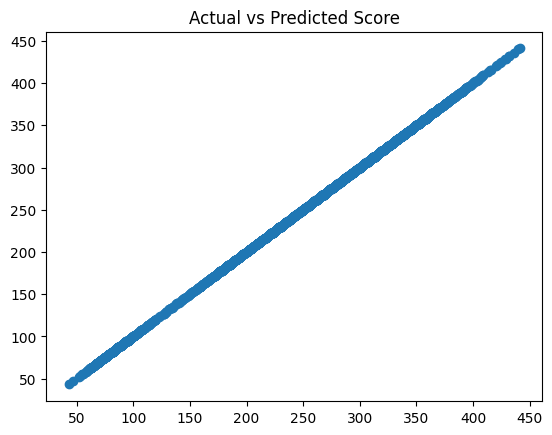

In [60]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Score")
plt.show()

Model Diagnostics and Checklist

1 - Non Linearity

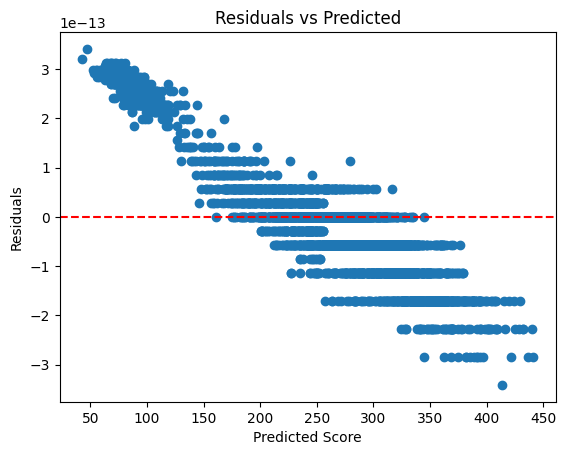

In [61]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Non-Constant Variance (Homoscedasticity)

In [62]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_const = sm.add_constant(X_test)
y = np.ravel(y)
test = het_breuschpagan(residuals, X_test_const)
print("Breusch-Pagan test p-value:", test[1])

Breusch-Pagan test p-value: 0.0


As the p-value is less than 0.05 we have heteroscedasticity deceted from our residuals.

Deviation from Normality

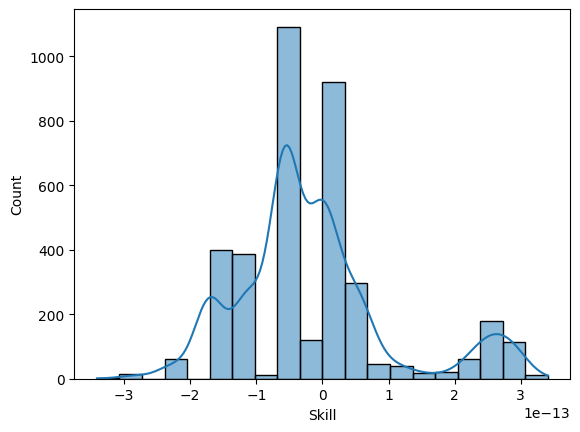

In [74]:
sns.histplot(residuals, bins=20, kde=True)
plt.show()

Autocorrelation

In [75]:
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson statistic:", durbin_watson(residuals))

Durbin-Watson statistic: 1.9749853873349337


Outliers

In [76]:
from scipy.stats import zscore

X_test["residuals"] = residuals
X_test["residuals_zscore"] = zscore(X_test["residuals"])
X_test[X_test["residuals_zscore"].abs() > 3]  # Outliers

,const,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,residuals,residuals_zscore
16464,1.0,42,8,9,7,8,10,8,11,12,5,11,3.410605e-13,3.047399


Missing Predictors

In [66]:
X_test.isnull().sum()

const               0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
residuals           0
residuals_zscore    0
dtype: int64